In [2]:
library(pim)
library(nleqslv)
library(data.table)
library(ggplot2)

In [3]:
# Parameters
n <- 50
u <- 1
alpha <- 5
sigma <- 1
trueBeta <- alpha/(sqrt(2) * sigma)

# Generate predictor
X <- runif(n = n, min = 0.1, max = u)
# Generate data
Y <- alpha*X + rnorm(n = n, mean = 0, sd = sigma)

# PIM package beta parameter
BETAvalue <- try(pim(formula = Y ~ X, link = 'probit', model = 'difference')@coef, silent = TRUE)
data.frame(BETAvalue,trueBeta)

,BETAvalue,trueBeta
X,3.270121,3.535534


In [4]:
n <- round(seq(10,25000,length.out = 25), 0)
n

[1]    10  1051  2092  3134  4175  5216  6258  7299  8340  9381 10422 11464
[13] 12505 13546 14588 15629 16670 17711 18752 19794 20835 21876 22918 23959
[25] 25000

EstimatedBeta,TrueBeta,SampleSize,TimeInMin
3.710759,3.535534,10,0.0002161145
3.284670,3.535534,1051,0.0246246656
3.525353,3.535534,2092,0.0819303473
3.523066,3.535534,3134,0.1468486508
3.565256,3.535534,4175,0.2352748672
3.618371,3.535534,5216,0.3785054167


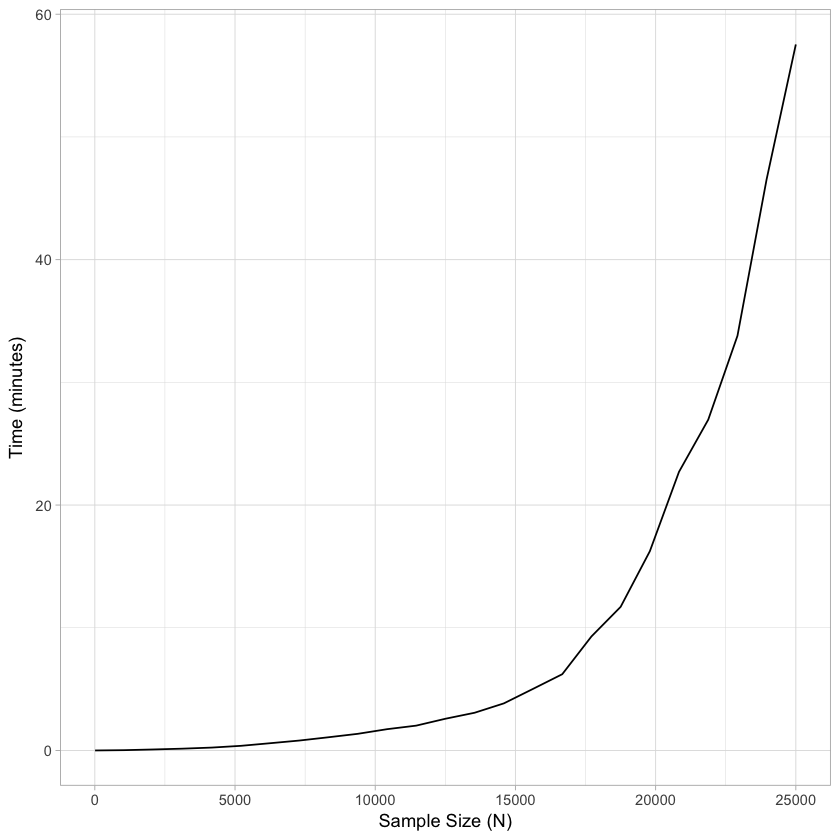

In [6]:
# Text files: time is measured in minutes
estimBeta <- fread('/Users/hanbossier/Dropbox/Mastat/Thesis/ResultsTimeNeeded/beta_501.txt', data.table = FALSE, col.names = 'EstimatedBeta')
TimeNeeded <- fread('/Users/hanbossier/Dropbox/Mastat/Thesis/ResultsTimeNeeded/time_501.txt', data.table = FALSE, col.names = 'TimeInMin')
# Overview
local <- data.frame(EstimatedBeta = estimBeta, TrueBeta = trueBeta, SampleSize = n, TimeInMin = TimeNeeded)
head(local)
# Plot
ggplot(local, aes(x = SampleSize, y = TimeInMin)) + geom_line() + 
    scale_x_continuous(name = "Sample Size (N)") + scale_y_continuous(name = "Time (minutes)") + theme_light()